# Practica 2: tipologia y ciclo de vida de los datos

BY LEIRE ALEGRIA MURILLO Y LAURA BELENGUER QUEROL

In [1]:
#Importing required packages
import pandas as pd
import numpy as np

### Graphic libraries
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Descripción del dataset

**¿Por qué es importante y qué pregunta/problema pretende responder?**


El conjunto de datos seleccionado comprende las variantes de tinto del "Vinho" Verde Portugués.

Se presentan datos referentes a los ***parámetros fisicoquímicos (entradas) y sensoriales (salida/target)***


***Variables entrada - parámetros físicoquímicos:***

1 - Fixed acidity: ácidos (no-volátiles) relacionados con el vino

2 - Volatile acidity: nivel de ácido acético, niveles altos significan sabor avinagrado

3 - Citric acid: aporta frescura y sabor a los vinos

4 - Residual sugar: cantidad remanente de azúcar cuando termina la fermentación. Extraño encontrar vinos con menos de 1

5 - Chlorides: cantidad de sal

6 - Free sulfur dioxide: sulfitos que previenen el crecimiento de microbial y la oxidación del vino

7 - Total sulfur dioxide: niveles altos de dióxido de sulfuro 50 ppm resultan detectable al olor y sabor

8 - density: quan similar es la densidad del vino dependiendo del contenido de alcohol y azúcar a la densidad del agua

9 - pH: cómo de ácido o básico es un vino en una escala de 0 (muy ácido) a 14 (muy básico). La mayoría de vinos se encuentran entre 3-4.

10 - Sulphates: aditivo del vino que puede contribuir a los niveles de SO2 (sulfitos)

11 - Alcohol: porcentaje de alcohol en el vino


***Target - datos sensoriales***

quality: basado en datos sensoriales, valores entre 0 y 10

Tenemos 1599 observaciones y 12 variables

In [3]:
# Cargamos los datos
wine = pd.read_csv('winequality-red.csv') 

In [4]:
# Dimension del dataset
wine.shape

(1599, 12)

In [5]:
# Observamos nuestros datos y comprobamos que esten bien cargados
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### 1.1. Análisis de la variable target

Su valor está entre 0 y 10. Observamos que solo tenemos valores entre 3 y 8. La mayoría de los vinos tienen una calificacion de 5 o 6.

In [6]:
wine['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

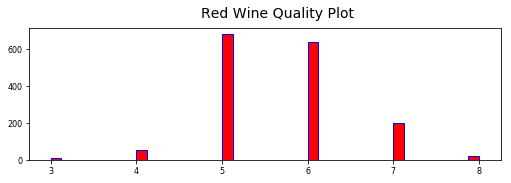

In [7]:
# Target distribution
wine['quality'].hist(bins=40, edgecolor='b', linewidth=1.0,
              xlabelsize=8, ylabelsize=8, grid=False, figsize=(6,2), color='red')    
plt.tight_layout(rect=(0, 0, 1.2, 1.2))   
plt.suptitle('Red Wine Quality Plot', x=0.65, y=1.25, fontsize=14);

Si un vino es excelente tiene una nota de 7 o superior, por lo que mas adelante creamos una variable llamada 'rating' donde clasificamos los vinos entre 'superior' o 'inferior'. Si su nota es superior a 7 sera superior, de lo contrario sera inferior.

### 1.2 Análisis del resto de variables 

Mostramos los valores estadísticos de cada atributo.

In [8]:
#Informacion sobre las columnas
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Calculámos el histograma de cada atributo.

In [9]:
target_wine = wine['quality']
data_wine = wine.drop(columns = ['quality'])

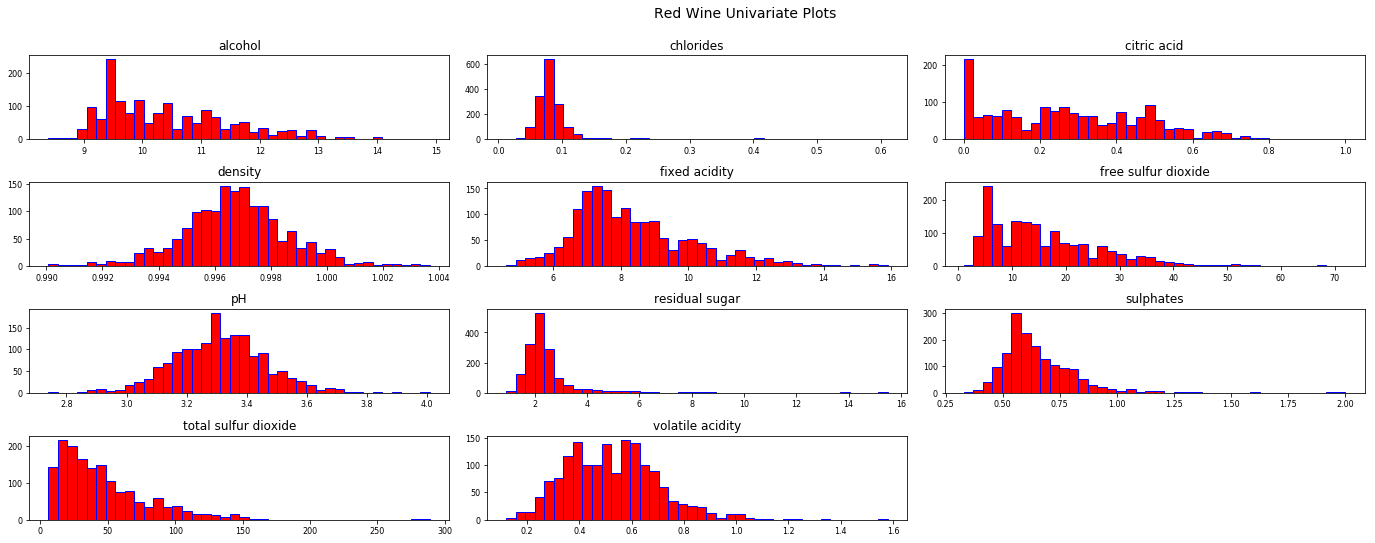

In [10]:
# Histogramas de todas las variables
data_wine.hist(bins=40, edgecolor='b', linewidth=1.0,
                          xlabelsize=8, ylabelsize=8, grid=False, 
                          figsize=(16,6), color='red')    
plt.tight_layout(rect=(0, 0, 1.2, 1.2))   
plt.suptitle('Red Wine Univariate Plots', x=0.65, y=1.25, fontsize=14);

## 2. Integración y selección de los datos de interés a analizar

### 2.1. Integración

La integración o fusión de los datos consiste en la combinación de datos procedentes de múltiples fuentes, con el fin de crear una estructura de datos coherente y única que contenga mayor cantidad de información.

En este caso los datos se encuentran todos en el mismo dataset, por lo tanto no hay que integrar datos de otro dataset.

### 2.2. Selección

Una de las primeras etapas en el preprocesado de los datos es el filtrado o selección de datos de interés.

En esta fase también es habitual realizar una exploración de los datos.

El preprocesado de los datos también puede incluir la creación de nuevas variables a partir de la extracción de características de los datos originales. Realizaremos está reducción con la variable 'quality'.

In [11]:
# Basado en las categorías encontradas en el apartado anterior para 'quality'
# creamos una nueva variable 'rating' con 3 categorias para los vinos
#conditions = [
#    (wine['quality'] >= 7),
#    (wine['quality'] <= 4)
#]
#rating = ['10','0']
#wine['rating'] = np.select(conditions,rating,default = 5)
#wine['rating'].value_counts()

In [12]:
# Basado en las categorías encontradas en el apartado anterior para 'quality'
# creamos una nueva variable 'rating' con 3 categorias para los vinos
conditions = [
    (wine['quality'] >= 6),
    (wine['quality'] <= 5)
]
rating = [1,0]
wine['rating'] = np.select(conditions,rating)
wine['rating'].value_counts()

1    855
0    744
Name: rating, dtype: int64

## 3. Limpieza de los datos 

### 3.1. ¿Los datos contienen ceros o elementos vacíos? ¿Cómo gestionarías cada uno de estos casos? 

In [13]:
# Comprobamos si faltan valores "missing values"
print(wine.isna().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
rating                  0
dtype: int64


In [14]:
# Comprobamos si hoy valores nulos
print(wine.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
rating                  0
dtype: int64


En caso que hubiesen datos NaN en alguna de las columnas, utilizariamos: wine2.dropna() para eliminar aquellas filas que contienen dichos valores NaN.

También podríamos asignar al registros perdidos la media o la mediana de ese atributo, dependiendo de la distribución de los datos. Esta media se puede calcular para toda la muestra o para cada una de las clases o categorías que la describan. 

Otras aproximaciones se basan en la implementación de métodos probabilistas para predecir (o imputar) los valores perdidos. Algunos de estos métodos son las regresiones, las inferencias basadas en modelos bayesianos o los árboles de decisión.

Ejemplos: método kNN o missForest para completar los valores pérdidos (NaN) o vacíos.

### 3.2. Identificación y tratamiento de valores extremos

Los valores extremos (extreme scores o outliers) son aquellos datos que se encuentran muy alejados de la distribución normal de una variable o población.

Son observaciones que se desvían tanto del resto que levantan sospechas sobre si fueron generadas mediante el mismo mecanismo. 

Estos valores pueden afectar de forma adversa los resultados de los análisis posteriores, al incrementar el error en la varianza de los datos y sesgar significativamente los cálculos y estimaciones.

En el apartado 1.2 hemos visto que algunas variables/atributos tienen una desviación standard (std) bastante elevada si observamos el valor de la media.

- citric acid

- volatile acidity

- residual sugar

- chlorides

- free sulfur dioxide

- total sulfur dioxide

Con los gráficos boxplot analizamos las variables de manera visual.

También basados en los valores de calidad, visualizamos como dichos parámetros afectan a la calidad del vino.

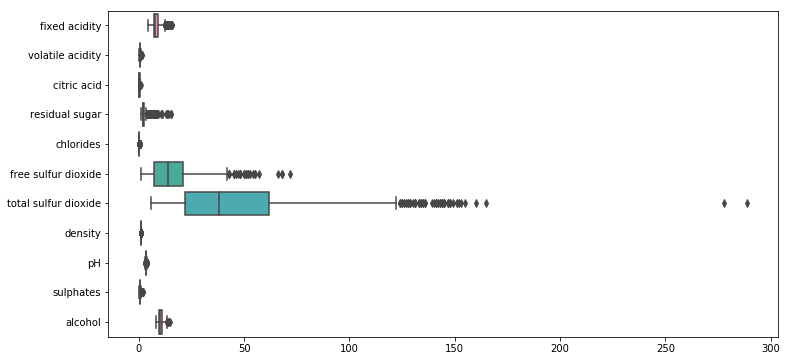

In [15]:
# Mostramos el boxplot de las variables (menos 'rating')
plt.figure(figsize=(12,6))
ax = sns.boxplot(data=wine.drop(columns = ['quality','rating']), orient="h")

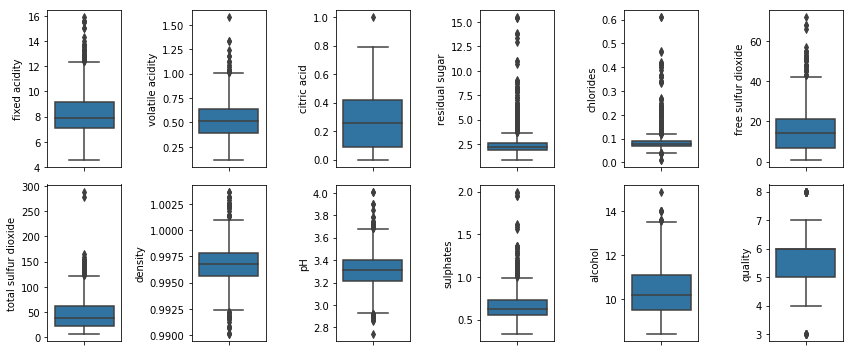

In [16]:
#Analizamos las variables una por una
fig, axes = plt.subplots(nrows=2, ncols=6, figsize=(12,5))

for i, ax in enumerate(axes.flatten()):
    sns.boxplot(y= wine.iloc[:, i],  orient='v' , ax=ax)

fig.tight_layout()

Observamos que total sulfur dioxide presenta valores extremos. Se seleccionan como outliers aquellos puntos que se encuentran, unidimensionalmente a más de 2 desviaciones estándar de la media (Distancia Mahalanobis)

In [17]:
data_wine_nout = data_wine[data_wine.apply(lambda x: np.abs(x - x.mean()) / x.std() < 2).all(axis=1)]
print(data_wine_nout.shape)

# Estadísticas sin outliers y sin variable quality/rating
data_wine_nout.describe()

(1124, 11)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1124.000000,1124.000000,1124.000000,1124.000000,1124.000000,1124.000000,1124.000000,1124.000000,1124.00000,1124.000000,1124.000000
mean,8.163078,0.518283,0.247589,2.264724,0.080899,14.591637,40.755338,0.996645,3.32113,0.632438,10.309638
std,1.365514,0.155680,0.177490,0.615027,0.017886,8.327425,24.493584,0.001448,0.12357,0.117353,0.903107
min,5.200000,0.180000,0.000000,1.200000,0.038000,1.000000,6.000000,0.993060,3.02000,0.330000,8.500000
25%,7.200000,0.398750,0.090000,1.900000,0.071000,8.000000,22.000000,0.995648,3.23000,0.550000,9.500000
50%,7.800000,0.520000,0.240000,2.100000,0.079000,13.000000,35.000000,0.996640,3.32000,0.610000,10.100000
75%,9.000000,0.630000,0.390000,2.500000,0.088250,20.000000,54.000000,0.997505,3.40000,0.700000,11.000000
max,11.800000,0.885000,0.660000,5.200000,0.178000,36.000000,112.000000,1.000400,3.61000,0.990000,12.500000


Verificamos los resultados comparándolos con los originales 

In [18]:
# Estadísticas datos originales sin la variable quality/rating
data_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000


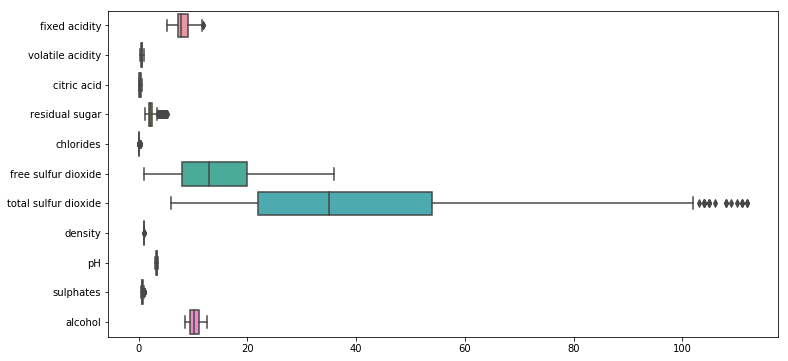

In [19]:
# Mostramos el boxplot de las variables (menos 'quality'/'rating')
plt.figure(figsize=(12,6))
ax = sns.boxplot(data=data_wine_nout, orient="h")

Aplicando el criterio de Mahalanobis para eliminar los valores extremos hemos reducido el tamaño de nuestro dataset de 1599 muestras a 1124. Con los boxplots vemos que se han reducido considerablemente los outliers para la mayoría de variables. Aunque ciertas variables como 'residual sugar' y 'chlorides' presentan un alto número de valores por encima del tercer cuartil (75% de los datos).

De todos modos eliminar dichos valores extremos puede dar lugar a eliminar aquellos vinos que marcan la diferencia por atributos excepcionales, por ello nos quedaremos con los atributos originales sin eliminar ningún outlier.

# 4. Análisis de los datos.

## 4.1. Selección de los grupos de datos que se quieren analizar/comparar (planificación de los análisis a aplicar). 

En los apartados anteriores hemos realizado un análisis descriptivo de los datos (describe(), boxplot) donde hemos encontrado los valores de la media, mediana, desviación estándar, cuartiles, valores mínimo y máximo antes y después de eliminar los outliers.

En los siguientes apartados realizaremos el análisis inferencial que tiene por objetivo modelar los datos a través de una distribución conocida. Partiendo de la premisa que el conjunto de datos estudiado representa una fracción de la totalidad de una población, su objetivo es inferir cómo es esa población, asumiendo un grado de error en las estimaciones por el hecho de disponer de una muestra reducida de los datos.

## 4.2. Comprobación de la normalidad y homogeneidad de la varianza.

***Normalidad***

Para la comprobación de que los valores que toman nuestras variables cuantitativas provienen de una población distribuida normalmente, utilizaremos la prueba de normalidad de Shapiro. 

Se comprueba que para que cada prueba se obtiene un p-valor superior al nivel de signiﬁcación preﬁjado α = 0.05. Si esto se cumple, entonces se considera que dicha variable sigue una distribución normal.

H_0 = Tiene una distribución normal

H_1 = No tiene una distribución normal

p <= alpha: rechazamos H_0, no hay normalidad.

p > alpha: no rechazamos H_0, hay normalidad.

In [20]:
from numpy.random import seed
from numpy.random import randn
# seed the random number generator
seed(1)

In [21]:
from scipy.stats import shapiro

names = list(wine.columns)

for i in range(len(names)):
    stat, p = shapiro(wine.iloc[:, i])
    print(names[i], ': p = %.3f' % (p))

fixed acidity : p = 0.000
volatile acidity : p = 0.000
citric acid : p = 0.000
residual sugar : p = 0.000
chlorides : p = 0.000
free sulfur dioxide : p = 0.000
total sulfur dioxide : p = 0.000
density : p = 0.000
pH : p = 0.000
sulphates : p = 0.000
alcohol : p = 0.000
quality : p = 0.000
rating : p = 0.000


Todas las variables tienen el p valor inferior a 0.05, por lo tanto, ninguna variable sigue una distribución normal.

***Homogeneidad***

Cuando los datos no cumplen con la condición de normalidad, cómo hemos visto en el apartado anterior, utilizamos el test Fligner-Killeen

La hipótesis nula asume igualdad de varianzas en los diferentes grupos de datos, por lo que p-valores inferiores al nivel de significancia (0.05) indicán heterocedasticidad.

En este caso lo aplicaremos a todas las variables, comparando los atributos (data_wine) con la variable target (quality)

In [22]:
# Aplicamos la prueba de Fligner
from scipy.stats import fligner

names = list(data_wine.columns)

for i in range(len(names)):
    stat, p = fligner(data_wine.iloc[:, i], wine['quality'])
    print(names[i], ': p = %.3f' % (p))

fixed acidity : p = 0.000
volatile acidity : p = 0.000
citric acid : p = 0.000
residual sugar : p = 0.001
chlorides : p = 0.000
free sulfur dioxide : p = 0.000
total sulfur dioxide : p = 0.000
density : p = 0.000
pH : p = 0.000
sulphates : p = 0.000
alcohol : p = 0.000


Encontramos por tanto Heterocedastidad

## 4.3. Aplicación de pruebas estadísticas para comparar los grupos de datos. 
#### En función de los datos y el objetivo del estudio, aplicar pruebas de contraste de hipótesis, correlaciones, regresiones, etc. Aplicar al menos tres métodos de análisis diferentes.

### ***Contraste de hipótesis***

* #### **Test Mann Whitney**

En el caso que consideremos 2 niveles para la variable 'rating' o podemos utilizar también la variable 'quality'

In [23]:
from scipy.stats import mannwhitneyu

for i in range(len(names)):
    stat, p = mannwhitneyu(wine.iloc[:, i][wine['rating']==0], wine.iloc[:, i][wine['rating']==1])
    print(names[i], ': p = %.3f' % (p))

fixed acidity : p = 0.001
volatile acidity : p = 0.000
citric acid : p = 0.000
residual sugar : p = 0.290
chlorides : p = 0.000
free sulfur dioxide : p = 0.016
total sulfur dioxide : p = 0.000
density : p = 0.000
pH : p = 0.418
sulphates : p = 0.000
alcohol : p = 0.000


Se comprueba que para que cada prueba se obtiene un p-valor superior al nivel de signiﬁcación preﬁjado α = 0.05. Si esto se cumple, entonces se considera que dicha variable sigue una distribución normal.

Por lo tanto aquellas variables con un p-valor mayor al nivel de significación son:

**Residual sugar, Free sulfur dioxide, pH**

* #### **Test Kruskal-Wallis**

En el caso que consideremos más de dos grupos, utilizamos el Test Kruskal-Wallis. Para ello utilizamos 3 niveles con la variable 'quality'

In [24]:
from scipy.stats import kruskal

for i in range(len(names)):
    stat, p = kruskal(wine.iloc[:, i][wine['quality']<=4], 
                      wine.iloc[:, i][(wine['quality']>4) & (wine['quality']<7)],
                      wine.iloc[:, i][wine['quality']>=7])
    print(names[i], ': p = %.3f' % (p))

fixed acidity : p = 0.000
volatile acidity : p = 0.000
citric acid : p = 0.000
residual sugar : p = 0.054
chlorides : p = 0.000
free sulfur dioxide : p = 0.000
total sulfur dioxide : p = 0.000
density : p = 0.000
pH : p = 0.000
sulphates : p = 0.000
alcohol : p = 0.000


En este caso la única variable significativa es **residual sugar**

### ***Correlación***

Procedemos a realizar un análisis de correlación entre las distintas variables para determinar cuáles de ellas ejercen una mayor inﬂuencia sobre la calidad del vino. Se utilizará el coeﬁciente de correlación de Person.

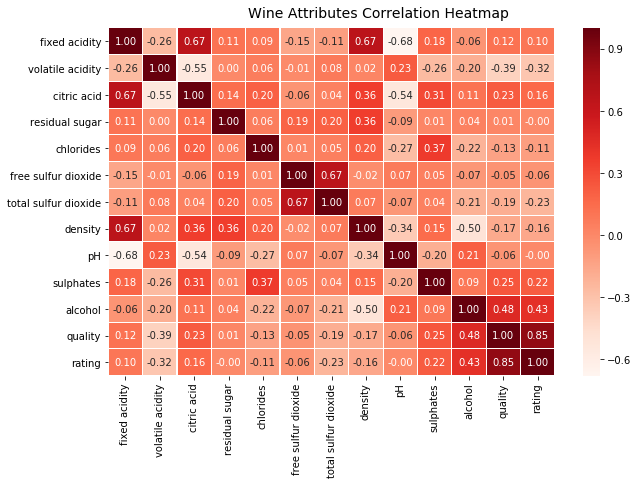

In [25]:
# Matriz de correlaciones
f, ax = plt.subplots(figsize=(10, 6))
corr = wine.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="Reds",fmt='.2f',
            linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Wine Attributes Correlation Heatmap', fontsize=14)

A partir del diagrama de matriz de correlación se puede observar que:

'fixed acidity':
- altamente correlacionada con el 'citric acid' y 'density'. 
- alto valor de correlación negativa con el pH.
- correlación con 'quality' es muy baja

'volatile acidity':
- correlaciona negativamente con 'citric acid' y 'quality'.

'citric acid' 
- alta correlación positiva con la 'fixed acidity'
- negativamente correlada con 'volatile acidity' y pH

'density':
- altamente correlada con la 'fixed acidity'
- negativamente correlada con el 'alcohol'

'pH':
- negativamente correlada con el 'fixed acidity' y 'citric acid')

'alcohol':
- negativamente correlada con la 'density'

'quality':
- positivamente correlada con 'alcohol' y en menor medida con los 'sulphates'

'free sulfur dioxide' y 'total sulfur dioxide' están bastante correlacionadas entre ellas pero no con el resto de variables.

Ninguna variable esta muy correlacionada con la calidad del vino. La correlacion mas alta la encontramos con alcohol 0.48, no es una correlación muy alta.

In [26]:
correlations = wine.corr()['quality'].drop(['quality','rating'])
print(correlations)

fixed acidity           0.124052
volatile acidity       -0.390558
citric acid             0.226373
residual sugar          0.013732
chlorides              -0.128907
free sulfur dioxide    -0.050656
total sulfur dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
Name: quality, dtype: float64


In [27]:
# Definimos una función para calcular los valores de correlación según un valor determinado
def get_features(corrs, corr_threshold):
    abs_corrs = corrs.abs()
    high_corrs = abs_corrs > corr_threshold
    return(high_corrs[high_corrs == True].index.values)

In [28]:
# Seleccionamos los atributos con más de 0.2 de correlación y aplicamos la función anterior
features_corr = get_features(correlations, 0.2) 
print(features_corr) 

['volatile acidity' 'citric acid' 'sulphates' 'alcohol']


In [29]:
# Añadimos 'residual sugar', 'free sulfur dioxide' y 'pH' del contraste de hipótesis
features = ['residual sugar', 'free sulfur dioxide', 'pH', 'volatile acidity', 'citric acid', 'sulphates', 'alcohol']
print(features)
X = wine[features]
y = wine['quality']

['residual sugar', 'free sulfur dioxide', 'pH', 'volatile acidity', 'citric acid', 'sulphates', 'alcohol']


# 5. Algoritmos

### ***Regresiones***

In [30]:
from sklearn.model_selection import train_test_split
from sklearn import metrics 

# Creamos los datos de entrenamiento y test utilizando train_test_split. Un 25% de los datos se utilizan para test y el 75% 
# para entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify = y)

In [31]:
from sklearn.linear_model import LinearRegression
# Ajustamos la regresión lineal a los datos de entrenamiento
regressor = LinearRegression()
regressor.fit(X_train,y_train)
  
# Con ello conseguimos los coeficientes de 10 atributos
print(regressor.coef_)

[-0.00270731 -0.00351384 -0.43696795 -1.19184977 -0.23639275  0.808723
  0.31869022]


In [32]:
# Para predecir la calidad del vino con este módelo, usamos 'predict()'
train_pred = regressor.predict(X_train)
test_pred = regressor.predict(X_test)

El RMSE es una medida que se utiliza para identificar las diferencias entre los valores.
Si hemos construido un buen módelo el RMSE debe ser muy similar. 
Si el RMSE es mayor para el test que para en train, seguramente tengamos un mal ajuste de los datos.

In [33]:
from sklearn.metrics import mean_squared_error
# Calculamos el  Root mean squared error (RMSE) para los datos de training como de test
train_rmse = mean_squared_error(train_pred, y_train) ** 0.5
print(train_rmse)
test_rmse = mean_squared_error(test_pred, y_test) ** 0.5
print(test_rmse)

0.6568305261855181
0.6512428921266832


Los resultados para RMSE del train y test son bastante similares, por lo tanto hemos construido un buen módelo.

In [34]:
# Redondeamos los valores predichos para el set de test
predicted_data = np.round_(test_pred)
print(predicted_data)

[6. 6. 6. 5. 5. 6. 6. 6. 5. 5. 6. 5. 6. 5. 5. 6. 6. 6. 7. 7. 5. 6. 6. 6.
 6. 5. 5. 5. 6. 5. 5. 6. 6. 5. 6. 5. 6. 6. 5. 5. 5. 5. 7. 6. 6. 6. 5. 6.
 6. 7. 6. 5. 6. 5. 5. 4. 5. 6. 6. 5. 6. 5. 6. 6. 6. 5. 5. 6. 6. 5. 6. 6.
 5. 5. 5. 5. 5. 6. 6. 6. 6. 5. 6. 6. 5. 5. 6. 6. 6. 5. 6. 7. 6. 5. 6. 6.
 6. 6. 5. 6. 5. 6. 6. 6. 6. 6. 5. 6. 6. 5. 6. 5. 5. 5. 6. 5. 5. 6. 6. 6.
 6. 6. 5. 7. 6. 7. 5. 7. 6. 6. 6. 5. 5. 5. 6. 6. 6. 5. 5. 5. 5. 6. 6. 6.
 6. 6. 6. 5. 5. 5. 5. 6. 7. 6. 6. 6. 6. 5. 6. 6. 6. 6. 6. 5. 5. 5. 5. 5.
 5. 6. 6. 6. 6. 5. 5. 6. 5. 6. 6. 5. 5. 6. 6. 6. 6. 5. 5. 6. 5. 5. 6. 6.
 6. 5. 5. 6. 5. 6. 5. 6. 6. 6. 5. 5. 6. 5. 5. 5. 5. 5. 5. 5. 6. 5. 6. 6.
 6. 5. 7. 6. 6. 6. 5. 6. 5. 6. 6. 7. 6. 6. 5. 5. 5. 5. 5. 6. 6. 7. 6. 7.
 6. 6. 6. 6. 6. 5. 5. 6. 5. 6. 5. 6. 6. 6. 5. 6. 6. 6. 5. 5. 5. 5. 5. 6.
 6. 5. 5. 5. 6. 5. 6. 6. 6. 5. 5. 6. 5. 5. 5. 5. 6. 7. 6. 5. 5. 5. 5. 5.
 5. 6. 6. 5. 6. 6. 6. 5. 6. 6. 5. 6. 6. 5. 6. 6. 6. 5. 5. 6. 5. 6. 6. 5.
 6. 5. 5. 5. 6. 6. 5. 7. 5. 6. 5. 5. 6. 5. 5. 5. 5.

In [35]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, test_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, test_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, test_pred)))

# Mostramos los coeficientes para cada atributo
coeff = pd.DataFrame(regressor.coef_,features) 
coeff.columns = ['Coeffecient'] 
print(coeff)

Mean Absolute Error: 0.5145492696310913
Mean Squared Error: 0.42411730454552665
RMSE: 0.6512428921266832
                     Coeffecient
residual sugar         -0.002707
free sulfur dioxide    -0.003514
pH                     -0.436968
volatile acidity       -1.191850
citric acid            -0.236393
sulphates               0.808723
alcohol                 0.318690


Estos coeficientes explican que si aumentamos en 1 unidad los 'sulphates', la calidad del vino aumentará un 0.74.
Igualmente para otras variables. Las negativas como la 'volatile acidity' 1 unidad de este atributo descenderá la calidad del vino en 1.26.

### ***Bosque de decisión***

In [36]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# sc = StandardScaler()

# X_train = sc.fit_transform(X_train)
# X_test = sc.fit_transform(X_test)

In [37]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [38]:
from sklearn.metrics import accuracy_score

print("Accuracy:", accuracy_score(y_test, pred_rfc))

Accuracy: 0.7


Acierta el 70% de las veces, algo mas que la regresión lineal.

### ***xgboost***

In [45]:
X_train.shape, X_test.shape

((1199, 7), (400, 7))

In [40]:
from xgboost import XGBClassifier, plot_importance
# ML in two lines ;)
xgb = XGBClassifier(objective='binary:logistic', random_state=33, n_jobs=-1)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=-1, nthread=None, objective='multi:softprob',
       random_state=33, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)

In [41]:
# make predictions for test data
xgb_predictions = xgb.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [46]:
# We design a simple classification evaluative function
def evaluation_scores(test, prediction, target_names=None):
    print('Accuracy:', np.round(metrics.accuracy_score(test, prediction), 4)) 
 

In [51]:
# Evaluate predictions
evaluation_scores(y_test, xgb_predictions)

Accuracy: 0.6225


La precisión del modelos XGBoots es de 62%.

# Comparar los resultados a partir de tablas y gráficas

Comparemos los tres modelos obtenimos mediante el accuracy de los datos de test:

Regresión lineal: 0.65

Bosque de decisión: 0.70

Xgboost: 0.62

El mejos modelo ha resultado ser el bosque de decisión, pero, con este modelo se pierde interpretabilidad. Sí nos quedemos con la regresion lineal perderiamos en precisión, pero, ganariamos en interpretabilidad. Tendremos que estudiar cada caso para decidir con cual nos quedamos.

# 6. Resolución del problema. A partir de los resultados obtenidos, ¿cuáles son las conclusiones? ¿Los resultados permiten responder al problema.

Los datos que tenemos son bastante buenos, puesto que no tenemos nha's y las diferentes variables tienen bastante variabilidad. Pero, cuando miramos la correlación nos damos cuenta que ninguna variable tiene mucha correlación con nuestra variable target. La consecuencia de esto se refleja en los modelos. Los modelos aciertan solo entre un 60 y un 70%.

### Biografia

P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009

https://github.com/ranjitkumarpatnaik/winequality-redwine/blob/master/winequality-red.ipynb
https://www.kaggle.com/vishalyo990/prediction-of-quality-of-wine
http://rpubs.com/jeswin_george/explore_red_quality_wines
https://github.com/paulgx/tipologiapractica2/blob/master/practica2Tipologia.pdf
https://www.kaggle.com/datacog314/tutorial-machine-learning-interpretability

https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/

Donde se pueden descargar los datos:

https://archive.ics.uci.edu/ml/datasets/wine+quality